In [1]:
import csv
from PIL import Image

# Load the image
img = Image.open(r'C:\Users\91817\Desktop\Earth.png')

# Get the dimensions
width, height = img.size

# Access the pixel values
pixels = img.load()

# Store the pixel values in a 2D array
pixel_array = []
for y in range(height):
    row = []
    for x in range(width):
        row.append(pixels[x, y])
    pixel_array.append(row)

# Save the pixel values as a CSV file
with open('pixel_values.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    for row in pixel_array:
        csvwriter.writerow(row)


# Separated R G B channels and implement FFT2 to achieve Colored compressed Output.jpg

The size of the INPUT .png image file is 145440 bytes in RAM.
Using fft2 with threshold 0%, we have compressed the image by 81.11% on disk. And the Compressed size is 27467
Using fft2 with threshold 2%, we have compressed the image by 81.08% on disk. And the Compressed size is 27523
Using fft2 with threshold 3%, we have compressed the image by 77.14% on disk. And the Compressed size is 33242
Using fft2 with threshold 4%, we have compressed the image by 67.99% on disk. And the Compressed size is 46554
Using fft2 with threshold 6%, we have compressed the image by 60.09% on disk. And the Compressed size is 58040
Using fft2 with threshold 8%, we have compressed the image by 57.21% on disk. And the Compressed size is 62238
Using fft2 with threshold 10%, we have compressed the image by 55.77% on disk. And the Compressed size is 64332
Using fft2 with threshold 12%, we have compressed the image by 55.03% on disk. And the Compressed size is 65403
Using fft2 with threshold 14%, we have compresse

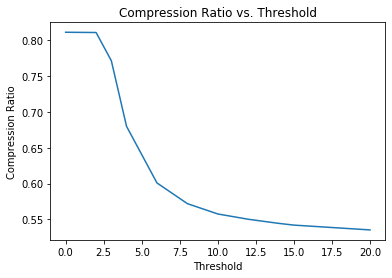

In [11]:
import csv
import numpy as np
from scipy.fftpack import fft2, ifft2
from PIL import Image
from io import BytesIO
import os
import matplotlib.pyplot as plt


# Load the pixel values from the CSV file
pixel_array = []
with open('pixel_values.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        pixel_row = []
        for pixel_str in row:
            r, g, b, a = [int(x) for x in pixel_str.strip('()').split(', ')]
            pixel_row.append((r, g, b, a))
        pixel_array.append(pixel_row)


# Convert the pixel values to a NumPy array
pixel_array = np.array(pixel_array)

# Separate the pixel array into red, green, and blue color channels
r_channel = pixel_array[:,:,0]
g_channel = pixel_array[:,:,1]
b_channel = pixel_array[:,:,2]

# Compute the 2D FFT of each color channel
r_fft_array = fft2(r_channel)
g_fft_array = fft2(g_channel)
b_fft_array = fft2(b_channel)

file_path = r'C:\Users\91817\Desktop\Earth.png'
file_size = os.path.getsize(file_path)

print(f"The size of the INPUT .png image file is {file_size} bytes in RAM.")

# Experiment with different thresholds for removing small RGB values
thresholds = [0,2,3,4,6,8, 10, 12, 14, 15, 20]
compression_ratios = []
for t in thresholds:
    # Remove points with small r-g-b values from each color channel
    r_fft_abs = np.abs(r_fft_array)
    r_fft_threshold = np.percentile(r_fft_abs, t)
    r_fft_mask = r_fft_abs > r_fft_threshold
    r_fft_array_masked = r_fft_array * r_fft_mask

    g_fft_abs = np.abs(g_fft_array)
    g_fft_threshold = np.percentile(g_fft_abs, t)
    g_fft_mask = g_fft_abs > g_fft_threshold
    g_fft_array_masked = g_fft_array * g_fft_mask

    b_fft_abs = np.abs(b_fft_array)
    b_fft_threshold = np.percentile(b_fft_abs, t)
    b_fft_mask = b_fft_abs > b_fft_threshold
    b_fft_array_masked = b_fft_array * b_fft_mask

    # Compute the inverse FFT to get each color channel back
    r_inv_fft_array = ifft2(r_fft_array_masked).real
    g_inv_fft_array = ifft2(g_fft_array_masked).real
    b_inv_fft_array = ifft2(b_fft_array_masked).real

    # Combine the color channels back into a single array and convert to an image
    inv_fft_array = np.dstack((r_inv_fft_array, g_inv_fft_array, b_inv_fft_array))
    inv_fft_img = Image.fromarray(inv_fft_array.astype('uint8')).convert('RGB')
    inv_fft_img.save(f'output_threshold_{t}.jpg',quality=90)

    # Calculate the size of the compressed image on disk
    with open(f'output_threshold_{t}.jpg', 'rb') as f:
        compressed_size = len(f.read())

    compression_ratio = 1 - compressed_size / file_size
    compression_ratios.append(compression_ratio)

    print(f"Using fft2 with threshold {t}%, we have compressed the image by {compression_ratio:.2%} on disk. And the Compressed size is",compressed_size)
# Plot the compression ratios against the thresholds
plt.plot(thresholds, compression_ratios)

# Add labels and title
plt.xlabel('Threshold')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs. Threshold')

# Show the plot
plt.show()


In this experiment, we separate the r,g,b channels first and apply fft and then merge it to achieve a compressed .jpeg file.
Based on the size of the output size of the compressed images with increasing thresholds, we can figure that 2% threshold is the maximum threshold to get a compressed .jpg file without losing clarity or details. After this threshold, the image seems to be losing a lot of the details and clarity.

# Averaged rgb values in a single cell and applied fft2 to get greyscale compressed output .jpeg files

The size of the INPUT .png image file is 145440 bytes in RAM.
Using fft2 with threshold 0%, we have compressed the image by 90.31% on disk. And the Compressed size is 14095
Using fft2 with threshold 5%, we have compressed the image by 90.31% on disk. And the Compressed size is 14095
Using fft2 with threshold 10%, we have compressed the image by 90.31% on disk. And the Compressed size is 14095
Using fft2 with threshold 20%, we have compressed the image by 90.31% on disk. And the Compressed size is 14095
Using fft2 with threshold 30%, we have compressed the image by 90.31% on disk. And the Compressed size is 14095
Using fft2 with threshold 40%, we have compressed the image by 90.31% on disk. And the Compressed size is 14095
Using fft2 with threshold 50%, we have compressed the image by 90.31% on disk. And the Compressed size is 14095
Using fft2 with threshold 60%, we have compressed the image by 90.31% on disk. And the Compressed size is 14095
Using fft2 with threshold 70%, we have compr

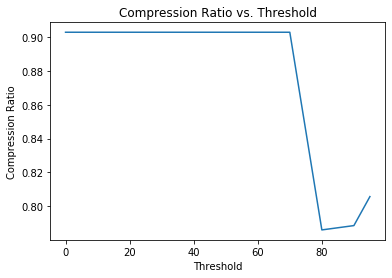

In [12]:
import csv
import numpy as np
from scipy.fftpack import fft2, ifft2
from PIL import Image

# Load the pixel values from the CSV file
pixel_array = []
with open('pixel_values.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        pixel_row = []
        for pixel_str in row:
            r, g, b, a = [int(x) for x in pixel_str.strip('()').split(', ')]
            pixel_avg = (int((r + g + b) / 3),) * 3
            pixel_row.append(pixel_avg)
        pixel_array.append(pixel_row)
# Convert the pixel values to a NumPy array
pixel_array = np.array(pixel_array)

# Compute the 2D FFT of the pixel values
fft_array = fft2(pixel_array)

file_path = r'C:\Users\91817\Desktop\Earth.png'
file_size = os.path.getsize(file_path)

print(f"The size of the INPUT .png image file is {file_size} bytes in RAM.")

# Experiment with different thresholds for removing small RGB values
thresholds = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95]
compression_ratios = []
for t in thresholds:
    # Remove points with small r-g-b values
    fft_abs = np.abs(fft_array)
    fft_threshold = np.percentile(fft_abs, t)
    fft_mask = fft_abs > fft_threshold
    fft_array_masked = fft_array * fft_mask

    # Compute the inverse FFT to get the image back
    inv_fft_array = ifft2(fft_array_masked).real

    # Convert the NumPy array to an image and save it
    inv_fft_img = Image.fromarray(inv_fft_array.astype('uint8')).convert('RGB')
    inv_fft_img.save(f'output_grey_threshold_{t}.jpg', optimize=True)

    # Calculate the size of the compressed image on disk
    with open(f'output_grey_threshold_{t}.jpg', 'rb') as f:
        compressed_size = len(f.read())

    compression_ratio = 1 - compressed_size / file_size
    compression_ratios.append(compression_ratio)

    print(f"Using fft2 with threshold {t}%, we have compressed the image by {compression_ratio:.2%} on disk. And the Compressed size is",compressed_size)
 # Plot the compression ratios against the thresholds
plt.plot(thresholds, compression_ratios)

# Add labels and title
plt.xlabel('Threshold')
plt.ylabel('Compression Ratio')
plt.title('Compression Ratio vs. Threshold')

# Show the plot
plt.show()


For this implementation, we average out rgb values to a single cell in every row and apply fft2. This results in a greyscale image. 
From the output we can see that the compression ratio decreases from 80% threshold which means that only few values are being removed, and also at this level the compressed image is losing clarity and quality.